In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import collections

In [2]:
data = pd.read_csv('QVI_data.csv')

In [3]:
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [4]:
grouped_stores = data.groupby(['STORE_NBR'])['PROD_QTY', 'TOT_SALES'].agg(['count','sum', 'mean'])
grouped_stores

PROD_QTY                 TOT_SALES                    
             count   sum      mean     count       sum      mean
STORE_NBR                                                       
1              573   704  1.228621       573   2393.60  4.177312
2              506   564  1.114625       506   2005.80  3.964032
3             1502  2915  1.940746      1502  12802.45  8.523602
4             1678  3316  1.976162      1678  14647.65  8.729231
5             1361  2704  1.986774      1361   9500.80  6.980749
...            ...   ...       ...       ...       ...       ...
268            546   732  1.340659       546   2601.05  4.763828
269           1607  3191  1.985688      1607  11221.80  6.983074
270           1630  3235  1.984663      1630  11293.95  6.928804
271           1385  2740  1.978339      1385   9721.80  7.019350
272            563  1063  1.888099       563   4653.95  8.266341

[272 rows x 6 columns]

In [5]:
df = data.set_index('DATE')
df

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
DATE,,,,,,,,,,,
2018-10-17,1000,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
2018-09-16,1002,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2019-03-07,1003,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
2019-03-08,1003,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
2018-11-02,1004,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-08,2370701,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
2018-10-01,2370751,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
2018-10-24,2370961,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264834 entries, 2018-10-17 to 2018-12-14
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   STORE_NBR         264834 non-null  int64  
 2   TXN_ID            264834 non-null  int64  
 3   PROD_NBR          264834 non-null  int64  
 4   PROD_NAME         264834 non-null  object 
 5   PROD_QTY          264834 non-null  int64  
 6   TOT_SALES         264834 non-null  float64
 7   PACK_SIZE         264834 non-null  int64  
 8   BRAND             264834 non-null  object 
 9   LIFESTAGE         264834 non-null  object 
 10  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(4)
memory usage: 24.2+ MB


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [8]:
data['DATE'] = data['DATE'].astype('datetime64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.2+ MB


In [9]:
test = data.set_index('DATE')
test

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
DATE,,,,,,,,,,,
2018-10-17,1000,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
2018-09-16,1002,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2019-03-07,1003,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
2019-03-08,1003,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
2018-11-02,1004,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-08,2370701,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
2018-10-01,2370751,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
2018-10-24,2370961,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget


In [10]:
#All the stores
g = test.groupby(pd.Grouper(freq="M"))
g.sum()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
DATE,,,,,,,
2018-07-31,3068665884,3053730,3055387824,1281140,43242,165275.30,4113243
2018-08-31,3029023164,3018052,3020290398,1265703,41284,158081.05,4084980
2018-09-30,2935684743,2920876,2921341503,1232717,41792,160522.00,3966539
2018-10-31,3022666677,3009915,3011690851,1263642,42821,164415.70,4072615
2018-11-30,2980459374,2960739,2963455193,1243890,41895,160233.70,3965999
2018-12-31,3105432810,3092407,3096418958,1293667,43845,167913.40,4172342
2019-01-31,2979395533,2975778,2976466341,1255743,42501,162642.30,4042141
2019-02-28,2771540398,2767238,2769802590,1151292,39220,150665.00,3731691
2019-03-31,3064783365,3060869,3062554866,1283571,43347,166265.20,4111250


In [11]:
store_one = test[test['STORE_NBR'] == 1]
store_one

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
DATE,,,,,,,,,,,
2018-10-17,1000,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
2018-09-16,1002,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2019-03-07,1003,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
2019-03-08,1003,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
2018-11-02,1004,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...
2019-05-27,1501,1,585,74,Tostitos Splash Of Lime 175g,2,8.8,175,TOSTITOS,RETIREES,Mainstream
2018-08-18,1502,1,587,13,Red Rock Deli Thai Chilli&Lime 150g,2,2.7,150,RRD,YOUNG FAMILIES,Mainstream
2018-07-25,1502,1,586,99,Pringles Sthrn FriedChicken 134g,1,3.7,134,PRINGLES,YOUNG FAMILIES,Mainstream


In [12]:
#test
grouped_store_1_cstm = store_one.groupby(['LYLTY_CARD_NBR'])['PROD_QTY', 'TOT_SALES'].agg(['sum', 'count', 'mean'])
grouped_store_1_cstm 

PROD_QTY            TOT_SALES            
                    sum count mean       sum count  mean
LYLTY_CARD_NBR                                          
1000                  2     1  2.0       6.0     1  6.00
1002                  1     1  1.0       2.7     1  2.70
1003                  2     2  1.0       6.6     2  3.30
1004                  1     1  1.0       1.9     1  1.90
1005                  1     1  1.0       2.8     1  2.80
...                 ...   ...  ...       ...   ...   ...
1494                  1     1  1.0       1.7     1  1.70
1495                  1     1  1.0       2.6     1  2.60
1501                  7     5  1.4      25.7     5  5.14
1502                  3     2  1.5       6.4     2  3.20
1504                  2     2  1.0       4.9     2  2.45

[345 rows x 6 columns]

In [13]:
f = store_one.groupby(pd.Grouper(freq="M"))
store_1_sums = f.sum() #Monthly TOT_SALES for store 1
store_1_sums
#62 total prod_qty, about 1.23-1.25 chips per customer

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
DATE,,,,,,,
2018-07-31,65903,52,16010,3082,62,206.9,9113
2018-08-31,54522,43,13240,2289,54,176.1,7798
2018-09-30,76595,62,16786,3282,75,278.8,11148
2018-10-31,56910,45,13745,2562,58,188.1,7807
2018-11-30,60103,47,15058,2850,57,192.6,8339
2018-12-31,58443,47,13193,2555,57,189.6,8346
2019-01-31,45537,36,11013,2244,42,154.8,6553
2019-02-28,68728,55,15843,3140,65,225.4,10859
2019-03-31,60912,49,13771,2680,58,192.9,9233


In [14]:
store_1_sums['PRICE'] = (store_1_sums['TOT_SALES']) / (store_1_sums['PROD_QTY'])
store_1_sums

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,PRICE
DATE,,,,,,,,
2018-07-31,65903,52,16010,3082,62,206.9,9113,3.337097
2018-08-31,54522,43,13240,2289,54,176.1,7798,3.261111
2018-09-30,76595,62,16786,3282,75,278.8,11148,3.717333
2018-10-31,56910,45,13745,2562,58,188.1,7807,3.243103
2018-11-30,60103,47,15058,2850,57,192.6,8339,3.378947
2018-12-31,58443,47,13193,2555,57,189.6,8346,3.326316
2019-01-31,45537,36,11013,2244,42,154.8,6553,3.685714
2019-02-28,68728,55,15843,3140,65,225.4,10859,3.467692
2019-03-31,60912,49,13771,2680,58,192.9,9233,3.325862


In [15]:
store1_counts = f.count()
store1_counts 
#counts number of unique transactions for each month, but not customers
#In month 1 (7-2018), it was 52 unique transactions

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
DATE,,,,,,,,,,,
2018-07-31,52,52,52,52,52,52,52,52,52,52,52
2018-08-31,43,43,43,43,43,43,43,43,43,43,43
2018-09-30,62,62,62,62,62,62,62,62,62,62,62
2018-10-31,45,45,45,45,45,45,45,45,45,45,45
2018-11-30,47,47,47,47,47,47,47,47,47,47,47
2018-12-31,47,47,47,47,47,47,47,47,47,47,47
2019-01-31,36,36,36,36,36,36,36,36,36,36,36
2019-02-28,55,55,55,55,55,55,55,55,55,55,55
2019-03-31,49,49,49,49,49,49,49,49,49,49,49


In [16]:
o = store1_counts['LYLTY_CARD_NBR'].count() #only 12 entries
o

12

In [17]:
min_date = store_one.index.min()
min_date

Timestamp('2018-07-01 00:00:00')

In [18]:
#month_1 = store_one[(store_one['DATE'] >= '2018-07-01') & (store_one['DATE'] <= '2018-07-31') ]
month_1 = store_one.loc['2018-07-01':'2018-07-31'] #need to get the date range
month_1

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
DATE,,,,,,,,,,,
2018-07-29,1011,1,12,84,GrnWves Plus Btroot & Chilli Jam 180g,2,6.2,180,GRNWVES,OLDER SINGLES/COUPLES,Mainstream
2018-07-06,1027,1,34,38,Infuzions Mango Chutny Papadums 70g,1,2.4,70,INFUZIONS,OLDER FAMILIES,Premium
2018-07-21,1042,1,45,94,Burger Rings 220g,1,2.3,220,BURGER,YOUNG SINGLES/COUPLES,Premium
2018-07-08,1055,1,62,43,Smith Crinkle Cut Bolognese 150g,1,2.6,150,SMITHS,RETIREES,Mainstream
2018-07-06,1057,1,64,23,Cheezels Cheese 330g,1,5.7,330,CHEEZELS,MIDAGE SINGLES/COUPLES,Mainstream
2018-07-21,1068,1,79,73,Smiths Crinkle Cut Salt & Vinegar 170g,1,2.9,170,SMITHS,YOUNG SINGLES/COUPLES,Premium
2018-07-27,1072,1,84,73,Smiths Crinkle Cut Salt & Vinegar 170g,2,5.8,170,SMITHS,NEW FAMILIES,Premium
2018-07-25,1087,1,98,90,Tostitos Smoked Chipotle 175g,1,4.4,175,TOSTITOS,RETIREES,Premium
2018-07-02,1096,1,110,68,Pringles Chicken Salt Crips 134g,1,3.7,134,PRINGLES,OLDER SINGLES/COUPLES,Premium


In [19]:
array_cstm_mo_1 = month_1['LYLTY_CARD_NBR']
unique_customers_mo_1 = len(array_cstm_mo_1.unique())
unique_customers_mo_1


49

In [20]:
#For July 2018 in Store 1, there are 52 unique transactions and  49 unique customers
#There are about 1 transaction per customer.
#From the code below, loyalty card numbers, 1188,1291 and 1318 made two transactions. Everyone else made 1
a = collections.Counter(array_cstm_mo_1)
a

Counter({1011: 1,
         1027: 1,
         1042: 1,
         1055: 1,
         1057: 1,
         1068: 1,
         1072: 1,
         1087: 1,
         1096: 1,
         1101: 1,
         1102: 1,
         1107: 1,
         1118: 1,
         1140: 1,
         1155: 1,
         1188: 2,
         1206: 1,
         1210: 1,
         1216: 1,
         1233: 1,
         1246: 1,
         1256: 1,
         1257: 1,
         1259: 1,
         1283: 1,
         1291: 2,
         1293: 1,
         1318: 2,
         1324: 1,
         1330: 1,
         1350: 1,
         1352: 1,
         1353: 1,
         1355: 1,
         1366: 1,
         1384: 1,
         1402: 1,
         1411: 1,
         1412: 1,
         1414: 1,
         1423: 1,
         1425: 1,
         1440: 1,
         1450: 1,
         1462: 1,
         1471: 1,
         1482: 1,
         1502: 1,
         1504: 1})

In [21]:
array_prod_mo_1 = month_1['PROD_QTY']
array_prod_mo_1.sum()

62

In [22]:
#repeat process for month 2
mo_2 = store_one.loc['2018-08-01':'2018-08-31']
unique_cst_mo_2 = len(mo_2['LYLTY_CARD_NBR'].unique())
unique_cst_mo_2 

42

In [23]:
#a = collections.Counter(unique_cst_mo_2) Duh, int is not iterable
b = collections.Counter(mo_2['LYLTY_CARD_NBR'])
b
#1380 was the only customer that bought twice

Counter({1020: 1,
         1027: 1,
         1048: 1,
         1053: 1,
         1114: 1,
         1118: 1,
         1122: 1,
         1143: 1,
         1147: 1,
         1163: 1,
         1169: 1,
         1173: 1,
         1183: 1,
         1187: 1,
         1203: 1,
         1209: 1,
         1223: 1,
         1228: 1,
         1270: 1,
         1278: 1,
         1280: 1,
         1282: 1,
         1284: 1,
         1291: 1,
         1292: 1,
         1294: 1,
         1312: 1,
         1330: 1,
         1335: 1,
         1336: 1,
         1341: 1,
         1375: 1,
         1380: 2,
         1383: 1,
         1385: 1,
         1404: 1,
         1417: 1,
         1436: 1,
         1444: 1,
         1460: 1,
         1501: 1,
         1502: 1})

In [24]:
mo_3 = store_one.loc['2018-09-01':'2018-09-30']
unique_cst_mo_3 = len(mo_3['LYLTY_CARD_NBR'].unique())
unique_cst_mo_3

59

In [25]:
c = collections.Counter(mo_3['LYLTY_CARD_NBR'])
c

Counter({1002: 1,
         1010: 1,
         1018: 1,
         1048: 1,
         1051: 1,
         1052: 1,
         1057: 1,
         1065: 2,
         1081: 1,
         1088: 1,
         1104: 1,
         1114: 2,
         1116: 1,
         1120: 1,
         1121: 1,
         1137: 1,
         1141: 1,
         1142: 1,
         1156: 1,
         1159: 1,
         1161: 1,
         1173: 1,
         1181: 1,
         1182: 1,
         1189: 1,
         1192: 1,
         1196: 1,
         1201: 1,
         1224: 1,
         1225: 1,
         1228: 1,
         1236: 1,
         1241: 1,
         1247: 1,
         1287: 1,
         1288: 2,
         1305: 1,
         1308: 1,
         1318: 1,
         1333: 1,
         1345: 1,
         1346: 1,
         1357: 1,
         1360: 1,
         1364: 1,
         1373: 1,
         1377: 1,
         1380: 1,
         1390: 1,
         1400: 1,
         1402: 1,
         1417: 1,
         1419: 1,
         1429: 1,
         1430: 1,
         1

In [26]:
mo_4 = store_one.loc['2018-10-01': '2018-10-31']
unique_cst_mo_4 = len(mo_4['LYLTY_CARD_NBR'].unique())
unique_cst_mo_4

44

In [27]:
mo_5 = store_one.loc['2018-11-01': '2018-11-30']
unique_cst_mo_5 = len(mo_5['LYLTY_CARD_NBR'].unique())
unique_cst_mo_5

46

In [28]:
#looking at price 

In [29]:
#testing month iterator
#never mind, have to update either 30 or 31 days
from dateutil import rrule
from datetime import datetime, timedelta

def datespan(startDate, endDate, delta=timedelta(days=1)):
    currentDate = startDate
    while currentDate < endDate:
        yield currentDate
        currentDate += delta
        
for day in datespan(datetime(2007, 3, 30), datetime(2007, 4, 3), delta = timedelta(days=1)):
    print(day)
    
    
datetime.now()

2007-03-30 00:00:00
2007-03-31 00:00:00
2007-04-01 00:00:00
2007-04-02 00:00:00


datetime.datetime(2020, 9, 9, 14, 41, 44, 490136)

In [30]:
store_two = test[test['STORE_NBR'] == 2]
store_two

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
DATE,,,,,,,,,,,
2019-03-06,2000,2,590,47,Doritos Corn Chips Original 170g,1,4.4,170,DORITOS,NEW FAMILIES,Mainstream
2019-03-21,2000,2,591,45,Smiths Thinly Cut Roast Chicken 175g,1,3.0,175,SMITHS,NEW FAMILIES,Mainstream
2019-05-12,2000,2,592,62,Pringles Mystery Flavour 134g,1,3.7,134,PRINGLES,NEW FAMILIES,Mainstream
2018-12-18,2001,2,593,62,Pringles Mystery Flavour 134g,1,3.7,134,PRINGLES,YOUNG SINGLES/COUPLES,Budget
2018-10-20,2002,2,594,5,Natural Chip Compny SeaSalt175g,1,3.0,175,NATURAL,RETIREES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...
2019-05-21,2491,2,1101,89,Kettle Sweet Chilli And Sour Cream 175g,1,5.4,175,KETTLE,MIDAGE SINGLES/COUPLES,Premium
2018-12-26,2492,2,1102,55,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,1,1.7,90,SUNBITES,OLDER SINGLES/COUPLES,Mainstream
2019-04-27,2492,2,1103,10,RRD SR Slow Rst Pork Belly 150g,1,2.7,150,RRD,OLDER SINGLES/COUPLES,Mainstream


In [31]:
y = store_two.groupby(pd.Grouper(freq="M"))
store_two_counts = y.count()
store_two_counts

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
DATE,,,,,,,,,,,
2018-07-31,41,41,41,41,41,41,41,41,41,41,41
2018-08-31,43,43,43,43,43,43,43,43,43,43,43
2018-09-30,37,37,37,37,37,37,37,37,37,37,37
2018-10-31,43,43,43,43,43,43,43,43,43,43,43
2018-11-30,40,40,40,40,40,40,40,40,40,40,40
2018-12-31,38,38,38,38,38,38,38,38,38,38,38
2019-01-31,45,45,45,45,45,45,45,45,45,45,45
2019-02-28,32,32,32,32,32,32,32,32,32,32,32
2019-03-31,46,46,46,46,46,46,46,46,46,46,46


In [32]:
y.sum()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
DATE,,,,,,,
2018-07-31,91496,82,34173,2322,46,150.8,7517
2018-08-31,96900,86,36773,2412,55,193.8,7786
2018-09-30,84090,74,32366,1855,41,154.4,6959
2018-10-31,96020,86,35853,1979,45,167.8,7717
2018-11-30,90106,80,34183,2616,44,162.9,7939
2018-12-31,84411,76,31190,2209,40,136.0,6506
2019-01-31,101545,90,38671,2658,49,162.8,7814
2019-02-28,73695,64,29063,1692,37,139.4,5893
2019-03-31,101508,92,37085,2708,51,192.1,8620


In [33]:
store2_7_2018 = store_two.loc['2018-07-01' : '2018-07-31']
unique_cst_store2_7_2018 = len(store2_7_2018['LYLTY_CARD_NBR'].unique())
unique_cst_store2_7_2018

39

In [34]:
store2_8_2018 = store_two.loc['2018-08-01' : '2018-08-31']
unique_cst_store2_8_2018 = len(store2_8_2018['LYLTY_CARD_NBR'].unique())
unique_cst_store2_8_2018

39

In [35]:
d = collections.Counter(store2_8_2018['LYLTY_CARD_NBR'])
d

Counter({2006: 1,
         2027: 1,
         2043: 1,
         2050: 2,
         2060: 1,
         2069: 1,
         2083: 1,
         2084: 1,
         2097: 1,
         2100: 1,
         2102: 1,
         2144: 2,
         2178: 1,
         2190: 1,
         2191: 1,
         2196: 1,
         2216: 1,
         2245: 1,
         2247: 1,
         2256: 1,
         2270: 1,
         2287: 1,
         2311: 2,
         2326: 1,
         2347: 1,
         2354: 2,
         2356: 1,
         2373: 1,
         2382: 1,
         2401: 1,
         2417: 1,
         2426: 1,
         2437: 1,
         2439: 1,
         2441: 1,
         2470: 1,
         2471: 1,
         2472: 1,
         2477: 1})

In [36]:
store_77 = test[test['STORE_NBR'] == 77]
store_77

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
DATE,,,,,,,,,,,
2019-03-28,77000,77,74911,18,Cheetos Chs & Bacon Balls 190g,1,3.3,190,CHEETOS,MIDAGE SINGLES/COUPLES,Budget
2019-04-13,77000,77,74912,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget
2018-09-26,77000,77,74910,36,Kettle Chilli 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget
2019-02-27,77001,77,74913,7,Smiths Crinkle Original 330g,2,11.4,330,SMITHS,YOUNG FAMILIES,Mainstream
2019-01-21,77001,77,74914,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...
2018-07-30,2330321,77,236756,71,Twisties Cheese Burger 250g,2,8.6,250,TWISTIES,YOUNG SINGLES/COUPLES,Mainstream
2018-11-18,2330331,77,236760,95,Sunbites Whlegrn Crisps Frch/Onin 90g,2,3.4,90,SUNBITES,RETIREES,Budget
2018-07-31,2330431,77,236770,50,Tostitos Lightly Salted 175g,1,4.4,175,TOSTITOS,OLDER SINGLES/COUPLES,Mainstream


In [37]:
min_date_store_77 = store_77.index.min()
min_date_store_77

Timestamp('2018-07-01 00:00:00')

In [38]:
monthly_data_store_77 = store_77.groupby(pd.Grouper(freq="M"))
new_monthly_data_store_77 = monthly_data_store_77.count().reset_index()
new_monthly_data_store_77 

,DATE,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-31,55,55,55,55,55,55,55,55,55,55,55
1,2018-08-31,48,48,48,48,48,48,48,48,48,48,48
2,2018-09-30,44,44,44,44,44,44,44,44,44,44,44
3,2018-10-31,38,38,38,38,38,38,38,38,38,38,38
4,2018-11-30,44,44,44,44,44,44,44,44,44,44,44
5,2018-12-31,49,49,49,49,49,49,49,49,49,49,49
6,2019-01-31,39,39,39,39,39,39,39,39,39,39,39
7,2019-02-28,45,45,45,45,45,45,45,45,45,45,45
8,2019-03-31,55,55,55,55,55,55,55,55,55,55,55
9,2019-04-30,48,48,48,48,48,48,48,48,48,48,48


In [39]:
new_monthly_data_store_77.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              12 non-null     datetime64[ns]
 1   LYLTY_CARD_NBR    12 non-null     int64         
 2   STORE_NBR         12 non-null     int64         
 3   TXN_ID            12 non-null     int64         
 4   PROD_NBR          12 non-null     int64         
 5   PROD_NAME         12 non-null     int64         
 6   PROD_QTY          12 non-null     int64         
 7   TOT_SALES         12 non-null     int64         
 8   PACK_SIZE         12 non-null     int64         
 9   BRAND             12 non-null     int64         
 10  LIFESTAGE         12 non-null     int64         
 11  PREMIUM_CUSTOMER  12 non-null     int64         
dtypes: datetime64[ns](1), int64(11)
memory usage: 1.2 KB


In [40]:
new_monthly_data_store_77['DATE_IN_STRINGS'] = new_monthly_data_store_77['DATE'].dt.strftime('%Y-%M-%D')
new_monthly_data_store_77

,DATE,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,DATE_IN_STRINGS
0,2018-07-31,55,55,55,55,55,55,55,55,55,55,55,2018-00-07/31/18
1,2018-08-31,48,48,48,48,48,48,48,48,48,48,48,2018-00-08/31/18
2,2018-09-30,44,44,44,44,44,44,44,44,44,44,44,2018-00-09/30/18
3,2018-10-31,38,38,38,38,38,38,38,38,38,38,38,2018-00-10/31/18
4,2018-11-30,44,44,44,44,44,44,44,44,44,44,44,2018-00-11/30/18
5,2018-12-31,49,49,49,49,49,49,49,49,49,49,49,2018-00-12/31/18
6,2019-01-31,39,39,39,39,39,39,39,39,39,39,39,2019-00-01/31/19
7,2019-02-28,45,45,45,45,45,45,45,45,45,45,45,2019-00-02/28/19
8,2019-03-31,55,55,55,55,55,55,55,55,55,55,55,2019-00-03/31/19
9,2019-04-30,48,48,48,48,48,48,48,48,48,48,48,2019-00-04/30/19


In [41]:
date_length = new_monthly_data_store_77['DATE_IN_STRINGS'].str.len()
date_length.value_counts()

16    12
Name: DATE_IN_STRINGS, dtype: int64

In [42]:
len(new_monthly_data_store_77['DATE'])

12

In [43]:
#prepping to find similar stores
sum_store77_monthly_data = monthly_data_store_77.sum()
sum_store77_monthly_data

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
DATE,,,,,,,
2018-07-31,15515929,4235,4944973,3133,84,296.8,9699
2018-08-31,3708076,3696,3608799,2720,74,255.5,8932
2018-09-30,10156424,3388,3791573,2393,70,225.2,7234
2018-10-31,2935575,2926,2857013,2360,52,204.5,6906
2018-11-30,19169576,3388,4438511,2502,67,245.3,8469
2018-12-31,3785902,3773,3684581,2757,72,267.3,9355
2019-01-31,3012973,3003,2932294,2386,65,204.4,6528
2019-02-28,3476372,3465,3383352,2437,74,235.0,8228
2019-03-31,4247308,4235,4133494,3456,82,278.5,9729


In [44]:
mean_monthly_store77_tot_sales = sum_store77_monthly_data['TOT_SALES'].mean()
mean_monthly_store77_tot_sales

253.33333333333334

In [45]:
store_77_counts = monthly_data_store_77.count()
store_77_counts

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
DATE,,,,,,,,,,,
2018-07-31,55,55,55,55,55,55,55,55,55,55,55
2018-08-31,48,48,48,48,48,48,48,48,48,48,48
2018-09-30,44,44,44,44,44,44,44,44,44,44,44
2018-10-31,38,38,38,38,38,38,38,38,38,38,38
2018-11-30,44,44,44,44,44,44,44,44,44,44,44
2018-12-31,49,49,49,49,49,49,49,49,49,49,49
2019-01-31,39,39,39,39,39,39,39,39,39,39,39
2019-02-28,45,45,45,45,45,45,45,45,45,45,45
2019-03-31,55,55,55,55,55,55,55,55,55,55,55


In [46]:
mean_test = store_77_counts['LYLTY_CARD_NBR'].mean()
mean_test

46.916666666666664

In [47]:
all_sales_77 = {}
for x in range (1, 273):
    store_num_trans = test[test['STORE_NBR'] == x]
    monthly_store_sum_total_sales = store_num_trans.groupby(pd.Grouper(freq = "M")).sum()
    monthly_store_count_trans = store_num_trans.groupby(pd.Grouper(freq = "M")).count()
    avg_total_sales_monthly = monthly_store_sum_total_sales['TOT_SALES'].mean()
    avg_store_counts_trans = monthly_store_count_trans['LYLTY_CARD_NBR'].mean()
    all_sales_77.update({x: [avg_total_sales_monthly, avg_store_counts_trans]})
all_sales_77

{1: [199.4666666666666, 47.75],
 2: [167.14999999999998, 42.166666666666664],
 3: [1066.8708333333332, 125.16666666666667],
 4: [1220.6375, 139.83333333333334],
 5: [791.7333333333332, 113.41666666666667],
 6: [223.74166666666667, 44.166666666666664],
 7: [1040.575, 123.5],
 8: [374.93333333333334, 43.333333333333336],
 9: [334.3666666666666, 54.916666666666664],
 10: [858.5249999999997, 122.25],
 11: [2.233333333333333, 0.6666666666666666],
 12: [417.49166666666673, 47.75],
 13: [890.5416666666665, 130.33333333333334],
 14: [34.225, 5.5],
 15: [790.5041666666663, 114.75],
 16: [136.00833333333333, 36.833333333333336],
 17: [386.3833333333334, 46.083333333333336],
 18: [272.47499999999997, 48.416666666666664],
 19: [747.7416666666664, 96.08333333333333],
 20: [209.9375, 46.583333333333336],
 21: [429.575, 50.0],
 22: [307.45, 48.5],
 23: [858.8166666666666, 124.16666666666667],
 24: [769.1666666666665, 112.33333333333333],
 25: [441.47083333333336, 50.083333333333336],
 26: [1205.77500

In [48]:
max_mean_sales = max(all_sales_77, key = all_sales_77.get)
max_mean_sales

226

In [49]:
min_mean_sales = min(all_sales_77, key = all_sales_77.get)
min_mean_sales
#great job 211

211

In [50]:
poor_211 = test[test['STORE_NBR'] == 211]
poor_monthly_trans_211 = poor_211.groupby(pd.Grouper(freq = 'M')).count()
poor_monthly_trans_211
#rip, it only had 2 transactions

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
DATE,,,,,,,,,,,
2018-07-31,1,1,1,1,1,1,1,1,1,1,1
2018-08-31,0,0,0,0,0,0,0,0,0,0,0
2018-09-30,0,0,0,0,0,0,0,0,0,0,0
2018-10-31,0,0,0,0,0,0,0,0,0,0,0
2018-11-30,0,0,0,0,0,0,0,0,0,0,0
2018-12-31,0,0,0,0,0,0,0,0,0,0,0
2019-01-31,0,0,0,0,0,0,0,0,0,0,0
2019-02-28,0,0,0,0,0,0,0,0,0,0,0
2019-03-31,0,0,0,0,0,0,0,0,0,0,0


In [51]:
poor_monthly_sales_211 = poor_211.groupby(pd.Grouper(freq = 'M')).sum()
poor_monthly_sales_211

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
DATE,,,,,,,
2018-07-31,211332,211,210516,101,1,2.6,300
2018-08-31,0,0,0,0,0,0.0,0
2018-09-30,0,0,0,0,0,0.0,0
2018-10-31,0,0,0,0,0,0.0,0
2018-11-30,0,0,0,0,0,0.0,0
2018-12-31,0,0,0,0,0,0.0,0
2019-01-31,0,0,0,0,0,0.0,0
2019-02-28,0,0,0,0,0,0.0,0
2019-03-31,0,0,0,0,0,0.0,0


In [52]:
poor_monthly_sales_211['TOT_SALES'].mean()

0.52

In [53]:
for key, value in all_sales_77.items():
    if key == 226:
        print(value)

[1467.1208333333334, 168.33333333333334]


In [54]:
for key, value in all_sales_77.items():
    if key == 211:
        print(value)

[0.52, 0.2]


In [55]:
similar_sales_77 = {}
for x in range (1, 273):
    store_num_trans = test[test['STORE_NBR'] == x]
    monthly_store_sum_total_sales = store_num_trans.groupby(pd.Grouper(freq = "M")).sum()
    monthly_store_count_trans = store_num_trans.groupby(pd.Grouper(freq = "M")).count()
    avg_total_sales_monthly = monthly_store_sum_total_sales['TOT_SALES'].mean()
    avg_store_counts_trans = monthly_store_count_trans['LYLTY_CARD_NBR'].mean()
    if ((avg_total_sales_monthly >= 240 and avg_total_sales_monthly  <= 260) and (avg_store_counts_trans >= 30 and avg_store_counts_trans <= 60)):
        similar_sales_77.update({x: [avg_total_sales_monthly, avg_store_counts_trans ]})
similar_sales_77
#stores 141, 50, 46 are closest to 77 in terms of sales 

{46: [251.95416666666674, 44.583333333333336],
 50: [250.8166666666667, 48.166666666666664],
 77: [253.33333333333334, 46.916666666666664],
 141: [252.11666666666665, 37.75],
 187: [242.475, 38.583333333333336],
 188: [257.16666666666663, 44.083333333333336],
 205: [247.23333333333332, 42.583333333333336],
 220: [250.68333333333328, 49.666666666666664]}

In [56]:
#all the differences
differences_store_77 = {}
for x in range (1, 273):
    store_num_trans = test[test['STORE_NBR'] == x]
    monthly_store_sales = store_num_trans.groupby(pd.Grouper(freq = "M")).sum()
    monthly_store_count_trans = store_num_trans.groupby(pd.Grouper(freq="M")).count()
    avg_total_sales_monthly = monthly_store_sales['TOT_SALES'].mean()
    avg_store_counts_trans = monthly_store_count_trans['LYLTY_CARD_NBR'].mean()
    tot_sales_diff = abs(mean_monthly_store77_tot_sales - avg_total_sales_monthly)
    store_counts_diff = abs(mean_test - avg_store_counts_trans)
    differences_store_77.update({x:[tot_sales_diff, store_counts_diff]})
differences_store_77

{1: [53.86666666666673, 0.8333333333333357],
 2: [86.18333333333337, 4.75],
 3: [813.5374999999998, 78.25],
 4: [967.3041666666667, 92.91666666666669],
 5: [538.3999999999999, 66.5],
 6: [29.59166666666667, 2.75],
 7: [787.2416666666667, 76.58333333333334],
 8: [121.6, 3.5833333333333286],
 9: [81.03333333333327, 8.0],
 10: [605.1916666666664, 75.33333333333334],
 11: [251.10000000000002, 46.25],
 12: [164.1583333333334, 0.8333333333333357],
 13: [637.2083333333331, 83.41666666666669],
 14: [219.10833333333335, 41.416666666666664],
 15: [537.1708333333329, 67.83333333333334],
 16: [117.32500000000002, 10.083333333333329],
 17: [133.05000000000004, 0.8333333333333286],
 18: [19.141666666666623, 1.5],
 19: [494.4083333333331, 49.166666666666664],
 20: [43.39583333333334, 0.3333333333333286],
 21: [176.24166666666665, 3.0833333333333357],
 22: [54.116666666666646, 1.5833333333333357],
 23: [605.4833333333332, 77.25],
 24: [515.8333333333331, 65.41666666666666],
 25: [188.13750000000002, 3

In [57]:
#filtering through the differences 
filtered_diff_store_77 = {}
for x in range (1, 273):
    store_num_trans = test[test['STORE_NBR'] == x]
    monthly_store_sales = store_num_trans.groupby(pd.Grouper(freq = "M")).sum()
    monthly_store_count_trans = store_num_trans.groupby(pd.Grouper(freq="M")).count()
    avg_total_sales_monthly = monthly_store_sales['TOT_SALES'].mean()
    avg_store_counts_trans = monthly_store_count_trans['LYLTY_CARD_NBR'].mean()
    tot_sales_diff = abs(mean_monthly_store77_tot_sales - avg_total_sales_monthly)
    store_counts_diff = abs(mean_test - avg_store_counts_trans)
    if (tot_sales_diff <= 5 and store_counts_diff <= 5):
        filtered_diff_store_77.update({x:[tot_sales_diff, store_counts_diff]})
filtered_diff_store_77
#still stores 46, 50 are the closest also 220 and 188. 141 not as much 
#second ranked store is a tie between 46 and 50 to trial store 77

{46: [1.379166666666606, 2.3333333333333286],
 50: [2.5166666666666515, 1.25],
 77: [0.0, 0.0],
 188: [3.833333333333286, 2.8333333333333286],
 220: [2.6500000000000625, 2.75]}

In [58]:
max_key = max(differences_store_77, key = differences_store_77.get)
max_key
#I just realized this is the max of differences, not the mean

226

In [59]:
max_store_nbr = test['STORE_NBR'].max()
max_store_nbr

272

In [60]:
#function to find all the stores that have sales every month for a year
control_stores = []
for x in range (1, max_store_nbr + 1):
    current_store = test[test['STORE_NBR'] == x]
    monthly_current_store_data = current_store.groupby(pd.Grouper(freq="M"))
    new_monthly_current_store_data = monthly_current_store_data.count().reset_index()
    if (len(new_monthly_current_store_data['DATE'] == 12)):
        control_stores.append(x)
        
control_stores

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [61]:
len(control_stores)
#Well apparently all the stores have sales from July 2018 to June 2019

272

In [136]:
store_233 = test[test['STORE_NBR'] == 233].groupby(pd.Grouper(freq = 'M')).count()
store_233

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
DATE,,,,,,,,,,,
2018-07-31,54,54,54,54,54,54,54,54,54,54,54
2018-08-31,50,50,50,50,50,50,50,50,50,50,50
2018-09-30,45,45,45,45,45,45,45,45,45,45,45
2018-10-31,36,36,36,36,36,36,36,36,36,36,36
2018-11-30,41,41,41,41,41,41,41,41,41,41,41
2018-12-31,50,50,50,50,50,50,50,50,50,50,50
2019-01-31,35,35,35,35,35,35,35,35,35,35,35
2019-02-28,47,47,47,47,47,47,47,47,47,47,47
2019-03-31,41,41,41,41,41,41,41,41,41,41,41


In [138]:
#Graph of Store 1 Transactions
filtered_store_monthly_transactions = store1_counts.filter(['LYLTY_CARD_NBR'])
filtered_store_monthly_transactions.rename(columns = {'LYLTY_CARD_NBR': 'Store 1 Transactions'}, inplace = True)
filtered_store_monthly_transactions['Store 2 Transactions'] = store_two_counts.filter(['LYLTY_CARD_NBR'])
filtered_store_monthly_transactions['Store 77 Transactions'] = store_77_counts.filter(['LYLTY_CARD_NBR'])
filtered_store_monthly_transactions['Store 233 Transactions'] = store_233.filter(['LYLTY_CARD_NBR'])
filtered_store_monthly_transactions

,Store 1 Transactions,Store 2 Transactions,Store 77 Transactions,Store 233 Transactions
DATE,,,,
2018-07-31,52,41,55,54
2018-08-31,43,43,48,50
2018-09-30,62,37,44,45
2018-10-31,45,43,38,36
2018-11-30,47,40,44,41
2018-12-31,47,38,49,50
2019-01-31,36,45,39,35
2019-02-28,55,32,45,47
2019-03-31,49,46,55,41


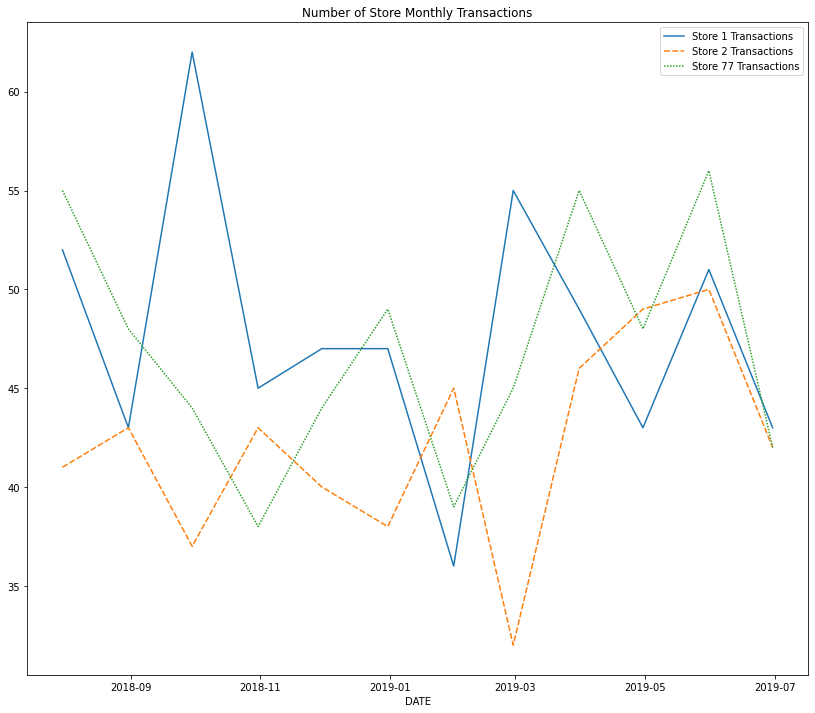

In [114]:
plt.figure(figsize=(14,12))
plt.title('Number of Store Monthly Transactions')
fig = sns.lineplot(data = filtered_store_monthly_transactions)
#ax.set_xticklabels(['2018-07-31','2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',  '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30'])

In [64]:
#review, looking at another trial store
store_86 = test[test['STORE_NBR'] == 86]
months_store_86 = store_86.groupby(pd.Grouper(freq="M")) 
months_store_86.sum()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
DATE,,,,,,,
2018-07-31,10851870,10836,10699421,6570,251,892.20,23009
2018-08-31,10131592,9632,10005022,6466,215,764.05,20442
2018-09-30,11109383,11094,10949061,7160,258,914.60,22557
2018-10-31,11884409,11868,11712604,7957,276,948.40,24111
2018-11-30,11284157,10922,11133969,6731,254,918.00,21699
2018-12-31,10335626,10320,10193376,6408,240,841.20,20810
2019-01-31,11197109,11180,11043994,7865,260,841.40,22413
2019-02-28,12936286,11954,12786521,8319,277,913.20,23864
2019-03-31,12436534,12212,12267247,8010,284,1026.80,26606


In [65]:
counts_months_store86 = months_store_86.count()

In [66]:
avg_counts_months_store86 = counts_months_store86['LYLTY_CARD_NBR'].mean()
avg_counts_months_store86

128.16666666666666

In [67]:
similar_trans_store86 = {}
for x in range(1, 273):
    current_store = test[test['STORE_NBR'] == x]
    monthly_current_store_data = current_store.groupby(pd.Grouper(freq="M"))
    sum_monthly_current_store_data = monthly_current_store_data.count()
    avg_monthly_current_store_count = sum_monthly_current_store_data['LYLTY_CARD_NBR'].mean()
    if avg_monthly_current_store_count >=128 and avg_monthly_current_store_count<=130:
        similar_trans_store86.update({x:avg_monthly_current_store_count})
similar_trans_store86
#looks like the closest number of sales for store 86 are stores 247, 13, and 164
#and here it's 164

{55: 129.75,
 57: 128.0,
 86: 128.16666666666666,
 123: 129.0,
 125: 128.75,
 164: 129.41666666666666,
 227: 128.58333333333334}

In [68]:
r = months_store_86['LYLTY_CARD_NBR'].sum().mean()
r 
#obviously, one number representing the mean of the loyalty_card_number sums 

11222418.916666666

In [69]:
m = months_store_86['TOT_SALES'].count()
m

DATE
2018-07-31    126
2018-08-31    112
2018-09-30    129
2018-10-31    138
2018-11-30    127
2018-12-31    120
2019-01-31    130
2019-02-28    139
2019-03-31    142
2019-04-30    127
2019-05-31    129
2019-06-30    119
Freq: M, Name: TOT_SALES, dtype: int64

In [70]:
sum_store_86 = months_store_86['TOT_SALES'].sum().mean()
sum_store_86
# range of monthly average sales to be used is >=886 and <900

886.2791666666664

In [71]:
x = months_store_86['TOT_SALES'].sum() #displays the sum for all months
x

DATE
2018-07-31     892.20
2018-08-31     764.05
2018-09-30     914.60
2018-10-31     948.40
2018-11-30     918.00
2018-12-31     841.20
2019-01-31     841.40
2019-02-28     913.20
2019-03-31    1026.80
2019-04-30     848.20
2019-05-31     889.30
2019-06-30     838.00
Freq: M, Name: TOT_SALES, dtype: float64

In [72]:
 y = months_store_86.count()

In [73]:
july_2018_store_86 = store_86.loc['2018-07-01': '2018-07-31']
unique_ctm_jult_2018_store_86 = len(july_2018_store_86['LYLTY_CARD_NBR'].unique())
unique_ctm_jult_2018_store_86

99

In [74]:
avg_monthly_counts_86 = months_store_86.count()['LYLTY_CARD_NBR'].mean() #average loyalty card number count

In [75]:
months_store_86.count().mean() #all the same counts for each column 

LYLTY_CARD_NBR      128.166667
STORE_NBR           128.166667
TXN_ID              128.166667
PROD_NBR            128.166667
PROD_NAME           128.166667
PROD_QTY            128.166667
TOT_SALES           128.166667
PACK_SIZE           128.166667
BRAND               128.166667
LIFESTAGE           128.166667
PREMIUM_CUSTOMER    128.166667
dtype: float64

In [76]:
f = months_store_86['LYLTY_CARD_NBR'].count()
f

DATE
2018-07-31    126
2018-08-31    112
2018-09-30    129
2018-10-31    138
2018-11-30    127
2018-12-31    120
2019-01-31    130
2019-02-28    139
2019-03-31    142
2019-04-30    127
2019-05-31    129
2019-06-30    119
Freq: M, Name: LYLTY_CARD_NBR, dtype: int64

In [77]:
testY = 9
if testY>=6 & testY <= 12:
    print("This is true")
else:
    print('This is false')

This is true


In [78]:
similar_sales = {}
for x in range (1, max_store_nbr + 1):
    current_store = test[test['STORE_NBR'] == x]
    monthly_current_store_data = current_store.groupby(pd.Grouper(freq="M"))
    sum_monthly_current_store_data = monthly_current_store_data.sum()
    avg_monthly_current_store_sale = sum_monthly_current_store_data['TOT_SALES'].mean()
    #if avg_monthly_current_store_sale>=786 & avg_monthly_current_store_sale <= 986:
    if avg_monthly_current_store_sale>=886 and avg_monthly_current_store_sale<=900:
        similar_sales.update({x: avg_monthly_current_store_sale})
similar_sales
#looks like the closest number of sales for store 86 are stores 247, 13, and 164

{13: 890.5416666666665,
 55: 896.6791666666664,
 86: 886.2791666666664,
 106: 895.2166666666664,
 164: 893.2416666666664,
 247: 887.6249999999999}

In [79]:
#let's do differences for store_86
diff_store_86 = {}
for x in range (1, max_store_nbr + 1):
    current_store = test[test['STORE_NBR'] == x]
    monthly_current_store = current_store.groupby(pd.Grouper(freq="M"))
    sum_monthly_current_store = monthly_current_store.sum()
    count_monthly_current_store = monthly_current_store.count()
    avg_count_store = count_monthly_current_store['LYLTY_CARD_NBR'].mean()
    avg_sum_store = sum_monthly_current_store['TOT_SALES'].mean()
    count_diff = abs(avg_count_store - avg_counts_months_store86)
    sum_diff = abs(avg_sum_store - sum_store_86)
    diff_store_86.update({x: [sum_diff, count_diff]})
diff_store_86

{1: [686.8124999999998, 80.41666666666666],
 2: [719.1291666666664, 86.0],
 3: [180.5916666666668, 2.999999999999986],
 4: [334.3583333333337, 11.666666666666686],
 5: [94.54583333333312, 14.749999999999986],
 6: [662.5374999999997, 84.0],
 7: [154.2958333333337, 4.666666666666657],
 8: [511.345833333333, 84.83333333333331],
 9: [551.9124999999997, 73.25],
 10: [27.754166666666606, 5.916666666666657],
 11: [884.045833333333, 127.49999999999999],
 12: [468.7874999999996, 80.41666666666666],
 13: [4.262500000000159, 2.1666666666666856],
 14: [852.0541666666663, 122.66666666666666],
 15: [95.77500000000009, 13.416666666666657],
 16: [750.270833333333, 91.33333333333331],
 17: [499.895833333333, 82.08333333333331],
 18: [613.8041666666663, 79.75],
 19: [138.5374999999999, 32.08333333333333],
 20: [676.3416666666664, 81.58333333333331],
 21: [456.70416666666637, 78.16666666666666],
 22: [578.8291666666664, 79.66666666666666],
 23: [27.46249999999975, 3.999999999999986],
 24: [117.1124999999

In [80]:
filtered_diff_store_86 = {}
for x in range (1, max_store_nbr + 1):
    current_store = test[test['STORE_NBR'] == x]
    monthly_current_store = current_store.groupby(pd.Grouper(freq="M"))
    sum_monthly_current_store = monthly_current_store.sum()
    count_monthly_current_store = monthly_current_store.count()
    avg_count_store = count_monthly_current_store['LYLTY_CARD_NBR'].mean()
    avg_sum_store = sum_monthly_current_store['TOT_SALES'].mean()
    count_diff = abs(avg_count_store - avg_counts_months_store86)
    sum_diff = abs(avg_sum_store - sum_store_86)
    if (count_diff <= 5 and sum_diff <=5):
        filtered_diff_store_86.update({x: [sum_diff, count_diff]})
filtered_diff_store_86
#store 155 looks to be the closest 

{13: [4.262500000000159, 2.1666666666666856],
 62: [4.354166666666629, 0.9166666666666572],
 86: [0.0, 0.0],
 155: [0.533333333333303, 0.2499999999999858],
 227: [1.070833333333212, 0.4166666666666856],
 236: [1.1958333333333258, 0.9166666666666572],
 247: [1.3458333333335304, 2.583333333333343]}

In [81]:
#testing just to narrow down by index
store_86.shape
store_86[123:140]

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
DATE,,,,,,,,,,,
2018-11-09,86019,86,84262,3,Kettle Sensations Camembert & Fig 150g,2,9.2,150,KETTLE,MIDAGE SINGLES/COUPLES,Mainstream
2018-11-16,86019,86,84263,82,Smith Crinkle Cut Mac N Cheese 150g,2,5.2,150,SMITHS,MIDAGE SINGLES/COUPLES,Mainstream
2018-12-20,86019,86,84264,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,MIDAGE SINGLES/COUPLES,Mainstream
2019-02-06,86019,86,84265,84,GrnWves Plus Btroot & Chilli Jam 180g,2,6.2,180,GRNWVES,MIDAGE SINGLES/COUPLES,Mainstream
2019-03-20,86019,86,84266,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,380,SMITHS,MIDAGE SINGLES/COUPLES,Mainstream
2019-05-05,86019,86,84267,7,Smiths Crinkle Original 330g,2,11.4,330,SMITHS,MIDAGE SINGLES/COUPLES,Mainstream
2018-11-19,86020,86,84268,54,CCs Original 175g,2,4.2,175,CCS,YOUNG FAMILIES,Mainstream
2018-11-27,86020,86,84269,48,Red Rock Deli Sp Salt & Truffle 150G,2,5.4,150,RRD,YOUNG FAMILIES,Mainstream
2019-02-17,86020,86,84270,61,Smiths Crinkle Cut Chips Chicken 170g,2,5.8,170,SMITHS,YOUNG FAMILIES,Mainstream


In [102]:
#store 88
store_88 = test[test['STORE_NBR'] == 88]
store_88_monthly = store_88.groupby(pd.Grouper(freq = "M"))
count_store_88_monthly = store_88_monthly.count()
count_store_88_monthly

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
DATE,,,,,,,,,,,
2018-07-31,153,153,153,153,153,153,153,153,153,153,153
2018-08-31,160,160,160,160,160,160,160,160,160,160,160
2018-09-30,159,159,159,159,159,159,159,159,159,159,159
2018-10-31,158,158,158,158,158,158,158,158,158,158,158
2018-11-30,157,157,157,157,157,157,157,157,157,157,157
2018-12-31,149,149,149,149,149,149,149,149,149,149,149
2019-01-31,146,146,146,146,146,146,146,146,146,146,146
2019-02-28,154,154,154,154,154,154,154,154,154,154,154
2019-03-31,170,170,170,170,170,170,170,170,170,170,170


In [103]:
avg_count_88 = count_store_88_monthly['LYLTY_CARD_NBR'].mean()
avg_count_88

156.08333333333334

In [104]:
sum_store_88_monthly = store_88_monthly.sum()
sum_store_88_monthly

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
DATE,,,,,,,
2018-07-31,13491241,13464,13326618,8255,306,1310.00,27688
2018-08-31,20957504,14080,14409106,8685,303,1323.80,29361
2018-09-30,14024708,13992,13871347,9386,318,1423.00,29209
2018-10-31,23062115,13904,14373777,8815,316,1352.40,27040
2018-11-30,13845499,13816,13683025,8394,314,1382.80,30116
2018-12-31,22423013,13112,15933998,7809,298,1325.20,28307
2019-01-31,12875401,12848,12724304,7282,292,1266.40,25818
2019-02-28,13577413,13552,13404520,8455,308,1370.20,27511
2019-03-31,14994051,14960,14826771,9382,340,1477.20,30291


In [105]:
avg_store_88_sales = sum_store_88_monthly['TOT_SALES'].mean()
avg_store_88_sales

1361.1041666666663

In [110]:
filtered_diff_store_88 = {}
for x in range (1, 273):
    current_store = test[test['STORE_NBR'] == x]
    monthly_current_store_data = current_store.groupby(pd.Grouper(freq = "M"))
    sum_monthly_current_store_data = monthly_current_store_data.sum()
    count_monthly_current_store_data = monthly_current_store_data.count()
    avg_sum_current_store = sum_monthly_current_store_data['TOT_SALES'].mean()
    avg_count_current_store = count_monthly_current_store_data ['LYLTY_CARD_NBR'].mean()
    diff_sum = abs(avg_store_88_sales - avg_sum_current_store)
    diff_count = abs(avg_count_88 - avg_count_current_store)
    if (diff_sum <= 100 and diff_count <= 100):
        filtered_diff_store_88.update({x:[diff_sum, diff_count]})
filtered_diff_store_88
#hmm store 165 looks to be the closest to store 88 

{40: [64.47916666666606, 9.083333333333343],
 58: [90.14999999999964, 10.833333333333343],
 88: [0.0, 0.0],
 165: [29.95833333333303, 4.5],
 237: [66.14583333333326, 7.333333333333343]}

In [88]:
again_3 = store1_counts.filter(['LYLTY_CARD_NBR'])
again_3.rename(columns={'LYLTY_CARD_NBR': 'Store 1 Total Monthly Transactions'}, inplace = True)
again_3

,Store 1 Total Monthly Transactions
DATE,
2018-07-31,52
2018-08-31,43
2018-09-30,62
2018-10-31,45
2018-11-30,47
2018-12-31,47
2019-01-31,36
2019-02-28,55
2019-03-31,49


In [89]:
for x in range (2, 273):
    current_store = test[test['STORE_NBR'] == x]
    monthly_current_store_data = current_store.groupby(pd.Grouper(freq = "M"))
    count_monthly_current_store_data = monthly_current_store_data.count()
    store_string_num = str(x)
    again_3['Store ' + store_string_num + ' Total Monthly Transactions'] = count_monthly_current_store_data.filter(['LYLTY_CARD_NBR'])
again_3

,Store 1 Total Monthly Transactions,Store 2 Total Monthly Transactions,Store 3 Total Monthly Transactions,Store 4 Total Monthly Transactions,Store 5 Total Monthly Transactions,Store 6 Total Monthly Transactions,Store 7 Total Monthly Transactions,Store 8 Total Monthly Transactions,Store 9 Total Monthly Transactions,Store 10 Total Monthly Transactions,...,Store 263 Total Monthly Transactions,Store 264 Total Monthly Transactions,Store 265 Total Monthly Transactions,Store 266 Total Monthly Transactions,Store 267 Total Monthly Transactions,Store 268 Total Monthly Transactions,Store 269 Total Monthly Transactions,Store 270 Total Monthly Transactions,Store 271 Total Monthly Transactions,Store 272 Total Monthly Transactions
DATE,,,,,,,,,,,,,,,,,,,,,
2018-07-31,52,41,138,160,120,51,120,43,50,122,...,9,53,54,33,2,52,139,139,129,52
2018-08-31,43,43,134,151,112,47,131,46,56,125,...,6,41,56,40,5,54,132,154,101,48
2018-09-30,62,37,119,138,125,38,128,36,59,139,...,4,46,33,40,5,34,124,126,114,36
2018-10-31,45,43,119,155,107,54,124,49,57,127,...,8,39,38,42,4,48,148,119,114,51
2018-11-30,47,40,118,139,111,51,129,40,65,128,...,2,38,63,39,9,51,136,133,122,45
2018-12-31,47,38,129,133,125,41,114,40,61,136,...,6,60,47,46,5,43,133,149,117,47
2019-01-31,36,45,121,168,118,37,115,50,66,126,...,5,50,34,46,9,38,144,155,120,50
2019-02-28,55,32,139,102,106,40,121,38,45,121,...,6,44,44,36,5,37,133,125,102,48
2019-03-31,49,46,130,135,97,40,139,52,54,120,...,5,40,37,33,6,47,122,143,101,53


In [131]:
trial_stores_trans = pd.DataFrame()
for (columnName, columnData) in again_3.iteritems():
    if (columnName == 'Store 77 Total Monthly Transactions'):
        trial_stores_trans['Store 77 TRIAL Monthly Transactions'] = columnData
    elif (columnName == 'Store 46 Total Monthly Transactions'):
        trial_stores_trans['Store 46 CONTROL Monthly Transactions'] = columnData
    elif (columnName == 'Store 50 Total Monthly Transactions'):
        trial_stores_trans['Store 50 CONTROL Monthly Transactions'] = columnData
    elif (columnName == 'Store 86 Total Monthly Transactions'):
        trial_stores_trans['Store 86 TRIAL Monthly Transactions'] = columnData
    elif (columnName == 'Store 155 Total Monthly Transactions'):
        trial_stores_trans['Store 155 CONTROL Monthly Transactions'] = columnData
    #elif (columnName == 'Store 165 Total Monthly Transactions'):
        #trial_stores_trans['Store 165 CONTROL Monthly Transactions'] = columnData 
    elif (columnName == 'Store 88 Total Monthly Transactions'):
        trial_stores_trans['Store 88 TRIAL Monthly Transactions'] = columnData  
trial_stores_trans

,Store 46 CONTROL Monthly Transactions,Store 50 CONTROL Monthly Transactions,Store 77 TRIAL Monthly Transactions,Store 86 TRIAL Monthly Transactions,Store 88 TRIAL Monthly Transactions,Store 155 CONTROL Monthly Transactions
DATE,,,,,,
2018-07-31,48,56,55,126,153,125
2018-08-31,46,56,48,112,160,120
2018-09-30,43,50,44,129,159,145
2018-10-31,49,50,38,138,158,136
2018-11-30,44,38,44,127,157,135
2018-12-31,53,69,49,120,149,121
2019-01-31,33,46,39,130,146,126
2019-02-28,38,32,45,139,154,127
2019-03-31,41,45,55,142,170,120


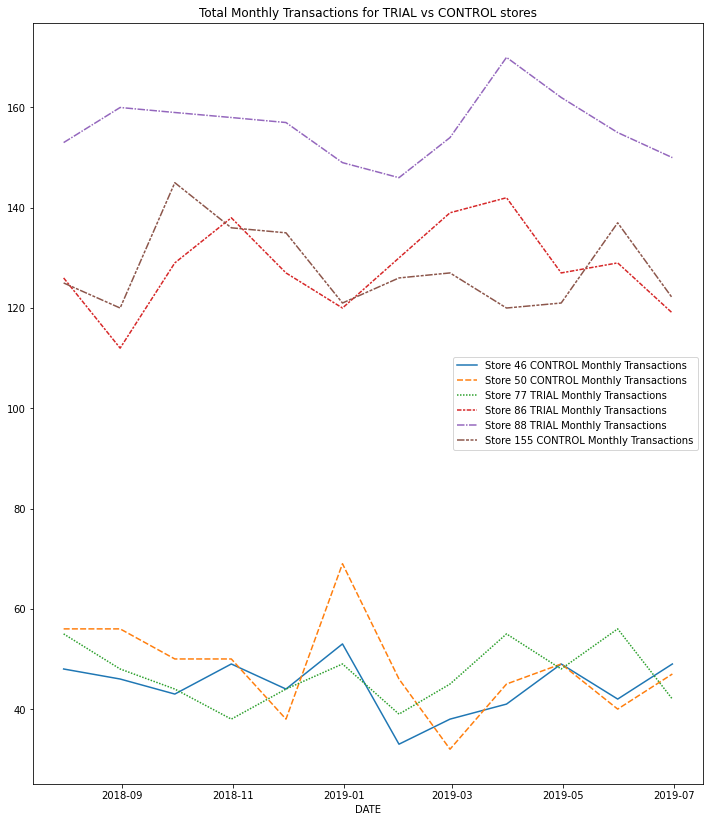

In [132]:
plt.figure(figsize=(12,14))
plt.title("Total Monthly Transactions for TRIAL vs CONTROL stores")
fig = sns.lineplot(data = trial_stores_trans)

In [90]:
#repeat for total sales 
again_4 = store_1_sums.filter(['TOT_SALES'])
again_4.rename(columns= {'TOT_SALES': 'Store 1 Monthly Sales'}, inplace = True)
again_4

,Store 1 Monthly Sales
DATE,
2018-07-31,206.9
2018-08-31,176.1
2018-09-30,278.8
2018-10-31,188.1
2018-11-30,192.6
2018-12-31,189.6
2019-01-31,154.8
2019-02-28,225.4
2019-03-31,192.9


In [134]:
for x in range (2, 273):
    current_store = test[test['STORE_NBR'] == x]
    monthly_current_store_data = current_store.groupby(pd.Grouper(freq = "M"))
    sum_monthly_current_store_data = monthly_current_store_data.sum()
    store_string_num = str(x)
    again_4['Store ' + store_string_num + ' Monthly Sales'] = sum_monthly_current_store_data.filter(['TOT_SALES'])
again_4

,Store 1 Monthly Sales,Store 2 Monthly Sales,Store 3 Monthly Sales,Store 4 Monthly Sales,Store 5 Monthly Sales,Store 6 Monthly Sales,Store 7 Monthly Sales,Store 8 Monthly Sales,Store 9 Monthly Sales,Store 10 Monthly Sales,...,Store 263 Monthly Sales,Store 264 Monthly Sales,Store 265 Monthly Sales,Store 266 Monthly Sales,Store 267 Monthly Sales,Store 268 Monthly Sales,Store 269 Monthly Sales,Store 270 Monthly Sales,Store 271 Monthly Sales,Store 272 Monthly Sales
DATE,,,,,,,,,,,,,,,,,,,,,
2018-07-31,206.9,150.8,1205.70,1399.90,812.0,260.0,1024.7,381.6,289.7,892.00,...,38.7,232.6,247.8,127.3,6.2,224.00,982.0,962.80,956.6,433.10
2018-08-31,176.1,193.8,1079.75,1259.50,745.1,203.2,1119.9,383.0,327.5,878.65,...,28.0,203.3,227.1,154.5,24.9,322.65,835.1,1003.75,683.9,372.85
2018-09-30,278.8,154.4,1021.50,1198.60,896.0,207.7,1147.3,293.0,369.7,945.00,...,21.8,199.5,133.5,139.0,23.3,174.40,886.0,845.40,798.4,304.70
2018-10-31,188.1,167.8,1037.90,1346.40,798.0,292.4,1063.9,422.8,361.0,910.80,...,36.6,170.0,162.9,170.4,14.4,237.60,1078.4,816.40,790.0,430.60
2018-11-30,192.6,162.9,1008.00,1212.00,771.4,255.3,1076.5,349.2,374.4,885.00,...,15.8,184.5,282.8,144.2,40.3,225.40,967.2,965.00,886.4,376.20
2018-12-31,189.6,136.0,1121.60,1185.60,879.2,209.1,906.1,356.4,382.6,936.60,...,24.6,288.5,205.3,157.8,15.4,207.30,935.4,1038.00,807.4,403.90
2019-01-31,154.8,162.8,1051.70,1525.00,838.0,191.1,975.1,445.0,399.4,878.60,...,21.3,247.3,176.7,148.7,34.4,157.70,980.4,1066.60,842.4,423.00
2019-02-28,225.4,139.4,1197.70,883.40,727.0,224.0,1026.4,345.4,259.4,853.00,...,37.4,175.2,212.7,119.7,23.0,165.00,955.2,868.40,746.2,395.50
2019-03-31,192.9,192.1,1124.40,1192.40,681.4,179.5,1145.8,441.4,367.6,862.00,...,26.0,161.0,164.1,128.2,23.6,225.00,845.8,991.20,735.8,442.30


In [94]:
again_4['Store 86 Monthly Sales']

DATE
2018-07-31     892.20
2018-08-31     764.05
2018-09-30     914.60
2018-10-31     948.40
2018-11-30     918.00
2018-12-31     841.20
2019-01-31     841.40
2019-02-28     913.20
2019-03-31    1026.80
2019-04-30     848.20
2019-05-31     889.30
2019-06-30     838.00
Freq: M, Name: Store 86 Monthly Sales, dtype: float64

In [120]:
trial_stores = pd.DataFrame()
for (columnName, columnData) in again_4.iteritems():
    if (columnName == 'Store 77 Monthly Sales'):
        trial_stores['Store 77 TRIAL Monthly Sales'] = columnData
    elif (columnName == 'Store 46 Monthly Sales'):
        trial_stores['Store 46 CONTROL Monthly Sales'] = columnData
    elif (columnName == 'Store 50 Monthly Sales'):
        trial_stores['Store 50 CONTROL Monthly Sales'] = columnData
    elif (columnName == 'Store 86 Monthly Sales'):
        trial_stores['Store 86 TRIAL Monthly Sales'] = columnData
    elif (columnName == 'Store 155 Monthly Sales'):
        trial_stores['Store 155 CONTROL Monthly Sales'] = columnData
    elif (columnName == 'Store 165 Monthly Sales'):
        trial_stores['Store 165 CONTROL Monthly Sales'] = columnData 
    #elif (columnName == 'Store 88 Monthly Sales'):
        #trial_stores['Store 88 TRIAL Monthly Sales'] = columnData  
trial_stores

,Store 46 CONTROL Monthly Sales,Store 50 CONTROL Monthly Sales,Store 77 TRIAL Monthly Sales,Store 86 TRIAL Monthly Sales,Store 155 CONTROL Monthly Sales,Store 165 CONTROL Monthly Sales
DATE,,,,,,
2018-07-31,253.00,314.4,296.8,892.20,924.60,1457.00
2018-08-31,240.70,292.4,255.5,764.05,782.70,1206.60
2018-09-30,233.00,258.8,225.2,914.60,1014.40,1281.20
2018-10-31,275.10,252.8,204.5,948.40,963.80,1234.40
2018-11-30,273.10,222.1,245.3,918.00,898.80,1291.20
2018-12-31,306.90,331.2,267.3,841.20,849.80,1345.40
2019-01-31,176.20,223.9,204.4,841.40,874.60,1422.00
2019-02-28,222.40,154.5,235.0,913.20,891.20,1237.50
2019-03-31,259.20,227.0,278.5,1026.80,804.40,1215.40


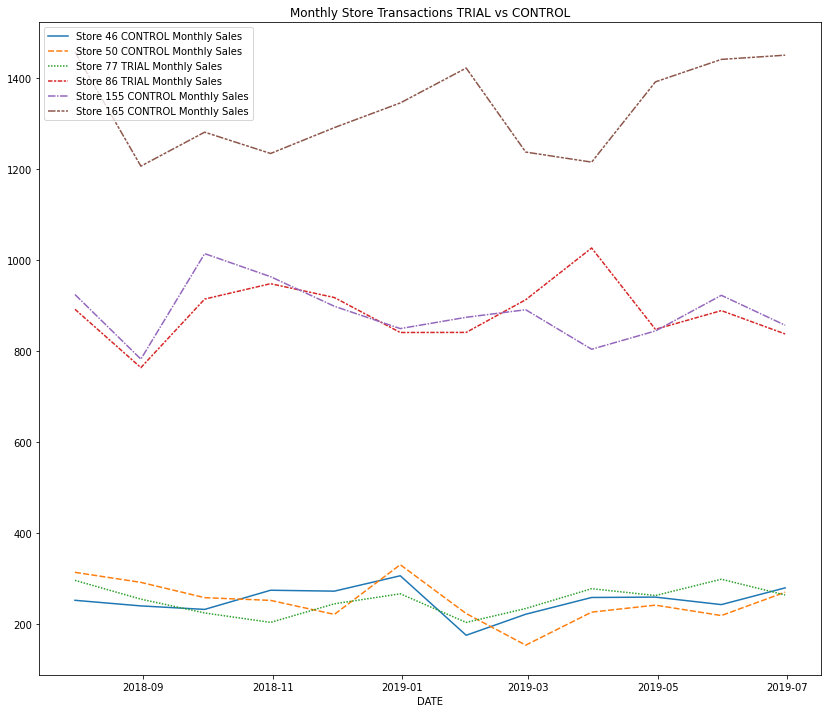

In [121]:
plt.figure(figsize=(14,12))
plt.title('Monthly Store Transactions TRIAL vs CONTROL')
fig = sns.lineplot(data = trial_stores)
#most lines it can plot is 6